數據資料來源為美國加利福尼亞大學爾灣分校UCI的開源資料https://archive.ics.uci.edu/ 裡的https://archive.ics.uci.edu/dataset/161/mammographic+mass 乳房X光數值


研究動機 :
    長年以來，癌症一直是台灣死因中最主要的原因之一，與第二名相比，其發生率幾乎高出了2倍。全球科學家一直在努力研究，希望能夠減少癌症所造成的悲劇次數。根據台灣衛福部國健署的統計數據顯示，女性乳癌的發病率逐年上升，從110年的2913人佔比17.1%，提升至111年的24.1%。這樣的增長速度非常令人擔憂。乳癌檢測的主要方法之一是X光攝影檢查，其優點在於對早期乳癌的鈣化點具有敏感檢測能力，可以在疾病早期進行預防和治療。然而，這種檢查需要對乳房進行緊壓，可能會引起疼痛和低劑量輻射，因此通常建議每1到2年進行一次檢查。由於檢測的準確性無法達到100%，因此我們希望通過應用AI機器學習技術來提高檢測準確率，並準確判斷腫瘤的性質，是良性還是惡性。

步驟:
    1.先處理資料中含有缺失值或是極端值等數據不平等的情況再做標準化
    2.再使用各種機器學習中的模型來訓練和測試資料
      Decision Trees、SVM、KNN、Naive Bayes、Logistic Regression等
    3.判斷哪個更具有效益且更高的準確度

In [7]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 資料前處理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# 讀取檔給予列名
data = pd.read_csv("mammographic_masses.data.txt",
                   header=None,
                   names= ["BI_RADS", # 有 1 到 5 的評估等級（但是是非預測性的數據，所以不採用）
                           "age",
                           "shape", # 形狀 : 圓形=1、橢圓形=2、小分岔=3、不規則=4
                           "margin", # 邊緣 : 圓滑=1、微小分岔=2、隱匿=3、不清晰=4、尖銳=5
                           "density", # 密度 : 高密度=1、等密度=2、低密度=3、含脂肪=4
                           "severity"], # 嚴重性 : 良性=0、惡性=1
                   na_values=["?"])
print("----------------------\n")
print("檢查前五項有無正確讀取數據:\n",data.head(), "\n")

# 統計法看有無偏差極端或數據不平等
print("----------------------\n")
print("統計資料:\n",data.describe(), "\n")

# 列出有空值的列
print("----------------------\n")
print("列出有缺失值的所有列:\n",data.loc[
      (data['age'].isnull()) |
      (data['shape'].isnull()) |
      (data['margin'].isnull()) |
      (data['density'].isnull())], "\n")

# 刪除null值
# 如果這裡沒inplace=True的話dropna()會返回一個修改後的data而不是修改原始數據
data.dropna(inplace=True)
print("----------------------\n")
print("刪除完缺失值的所有列:\n",data, "\n")

# 提取特徵、預測目標、標籤名
all_features = data[['age', 'shape', 'margin', 'density']].values
all_prediction = data['severity'].values
feature_names = ['age', 'shape', 'margin', 'density']

# 標準化
scaler = preprocessing.StandardScaler()
normalized_all_features= scaler.fit_transform(all_features)
print("----------------------\n")
print("標準化後處裡完的資料:\n",normalized_all_features)



----------------------

檢查前五項有無正確讀取數據:
    BI_RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1 

----------------------

統計資料:
           BI_RADS         age       shape      margin     density    severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.0000

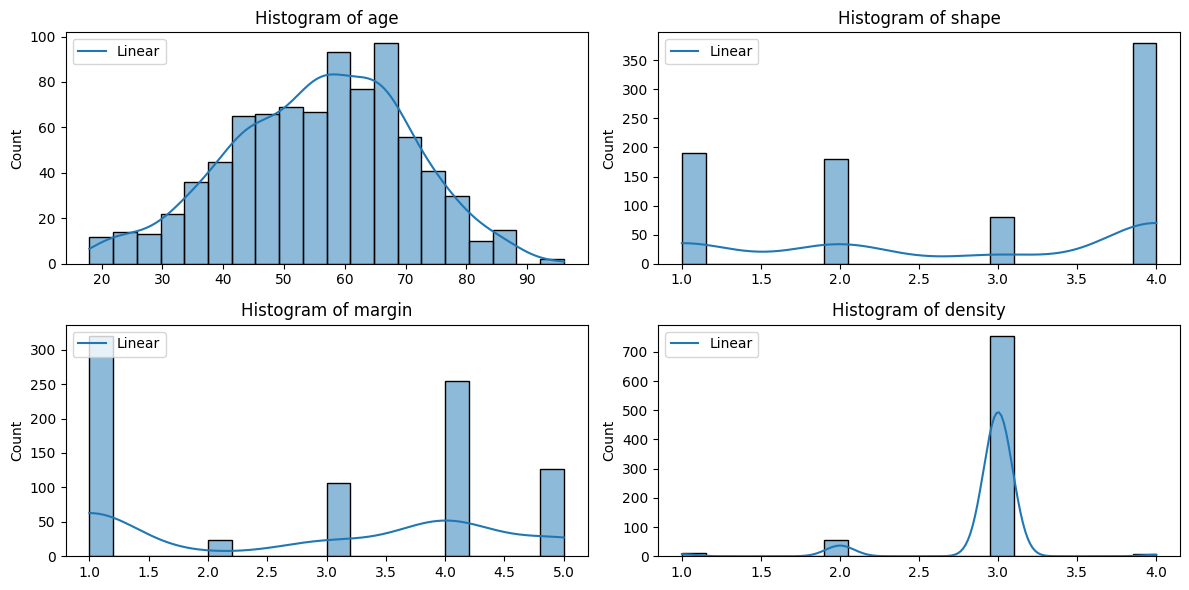

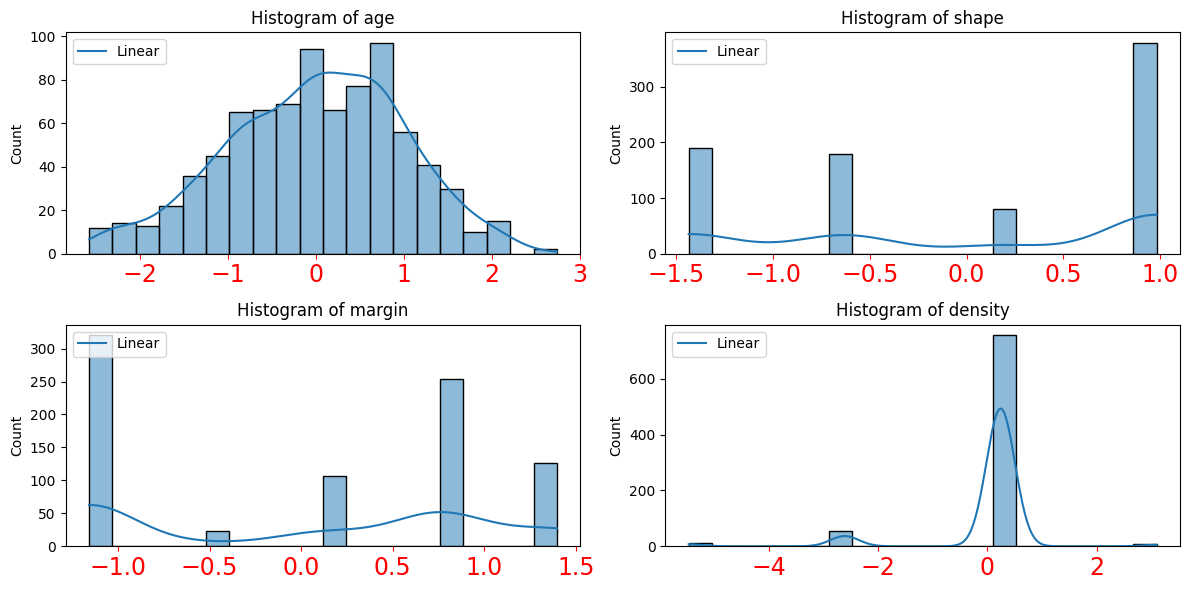

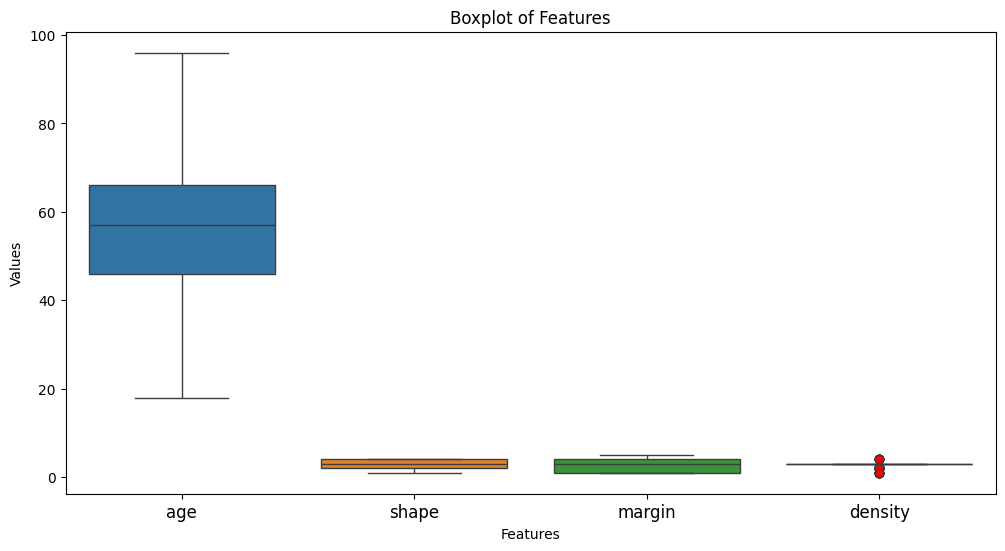

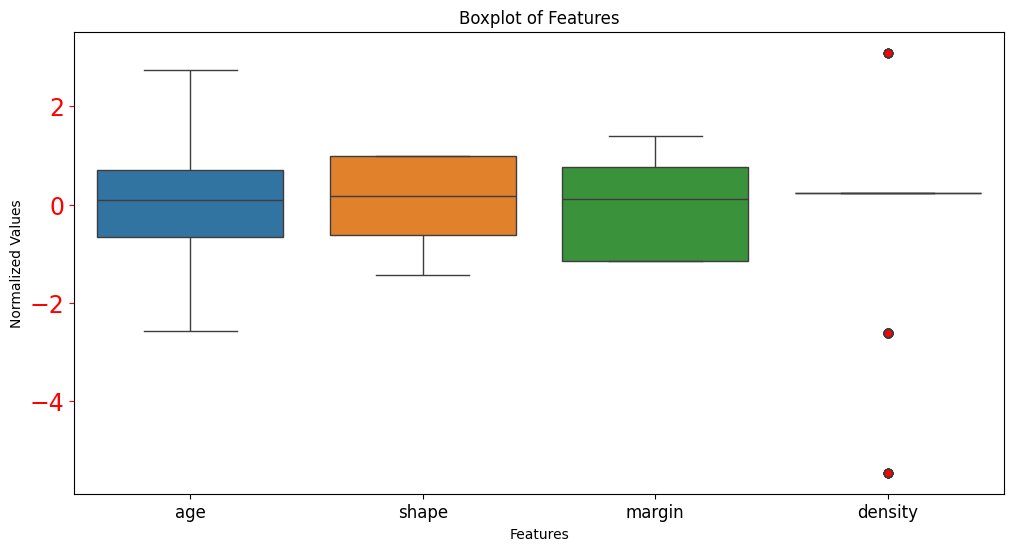

In [2]:
        # 繪製直方圖
    # 標準化前
plt.figure(figsize=(12, 6))
for i in range(all_features.shape[1]):
    plt.subplot(2, 2, i + 1) 
    sns.histplot(all_features[:, i],
                 bins=20,
                 kde=True)
    plt.legend(['Linear'], loc='upper left')
    plt.title(f'Histogram of {feature_names[i]}') 
    plt.tight_layout()
plt.show()

    # 標準化後
plt.figure(figsize=(12, 6)) # 設置圖形大小
for i in range(normalized_all_features.shape[1]): # shape[]用於獲取數組的列數
    plt.subplot(2, 2, i + 1) # 創建子圖，2行2列，當前為第i+1個子圖
    sns.histplot(normalized_all_features[:, i],
                 bins=20, # 直方圖的柱子數量為 20
                 kde=True) # 以柱子為基準繪製平滑曲線
    plt.legend(['Linear'], loc='upper left') # 解釋線的意義
    plt.title(f'Histogram of {feature_names[i]}') # 設置標題
    plt.tick_params(axis='x', colors='red') # 改變X軸數值顏色更易分辨差距
    plt.tight_layout() # 調整子圖的布局使其之間不重疊
    plt.xticks(fontsize=17)
plt.show()




        #繪製箱線圖
# 頂部線表第3四分位數(Q3)，及由小到大排列第75%的數
# 底部線表第1四分位數(Q1)，及由小到大排列第25%的數
# 中間線表中位數
# 箱體的高度表數據的分布範圍，亦稱上下四分位距(IQR = Q3-Q1)
# 異常值則以點的形式，在這裡我設定顏色為紅加以辨識

    # 標準化前
plt.figure(figsize=(12, 6))
sns.boxplot(data=all_features,
            flierprops=dict(marker='o',
                            markerfacecolor='red',
                            markersize=6))
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(range(len(feature_names)), feature_names, fontsize=12)
plt.show()

    # 標準化後
plt.figure(figsize=(12, 6))
sns.boxplot(data=normalized_all_features,
            flierprops=dict(marker='o', # 設定異常值的樣式
                            markerfacecolor='red', # 顏色
                            markersize=6)) # 大小
plt.title('Boxplot of Features')
plt.xlabel('Features') # 設置 X 軸的標籤
plt.ylabel('Normalized Values') # 設置 Y 軸的標籤
plt.tick_params(axis='y', colors='red') # 改變X軸數值顏色更易分辨差距
plt.yticks(fontsize=17)
plt.xticks(range(len(feature_names)), feature_names, fontsize=12)
plt.show()



## Decision Trees 決策樹

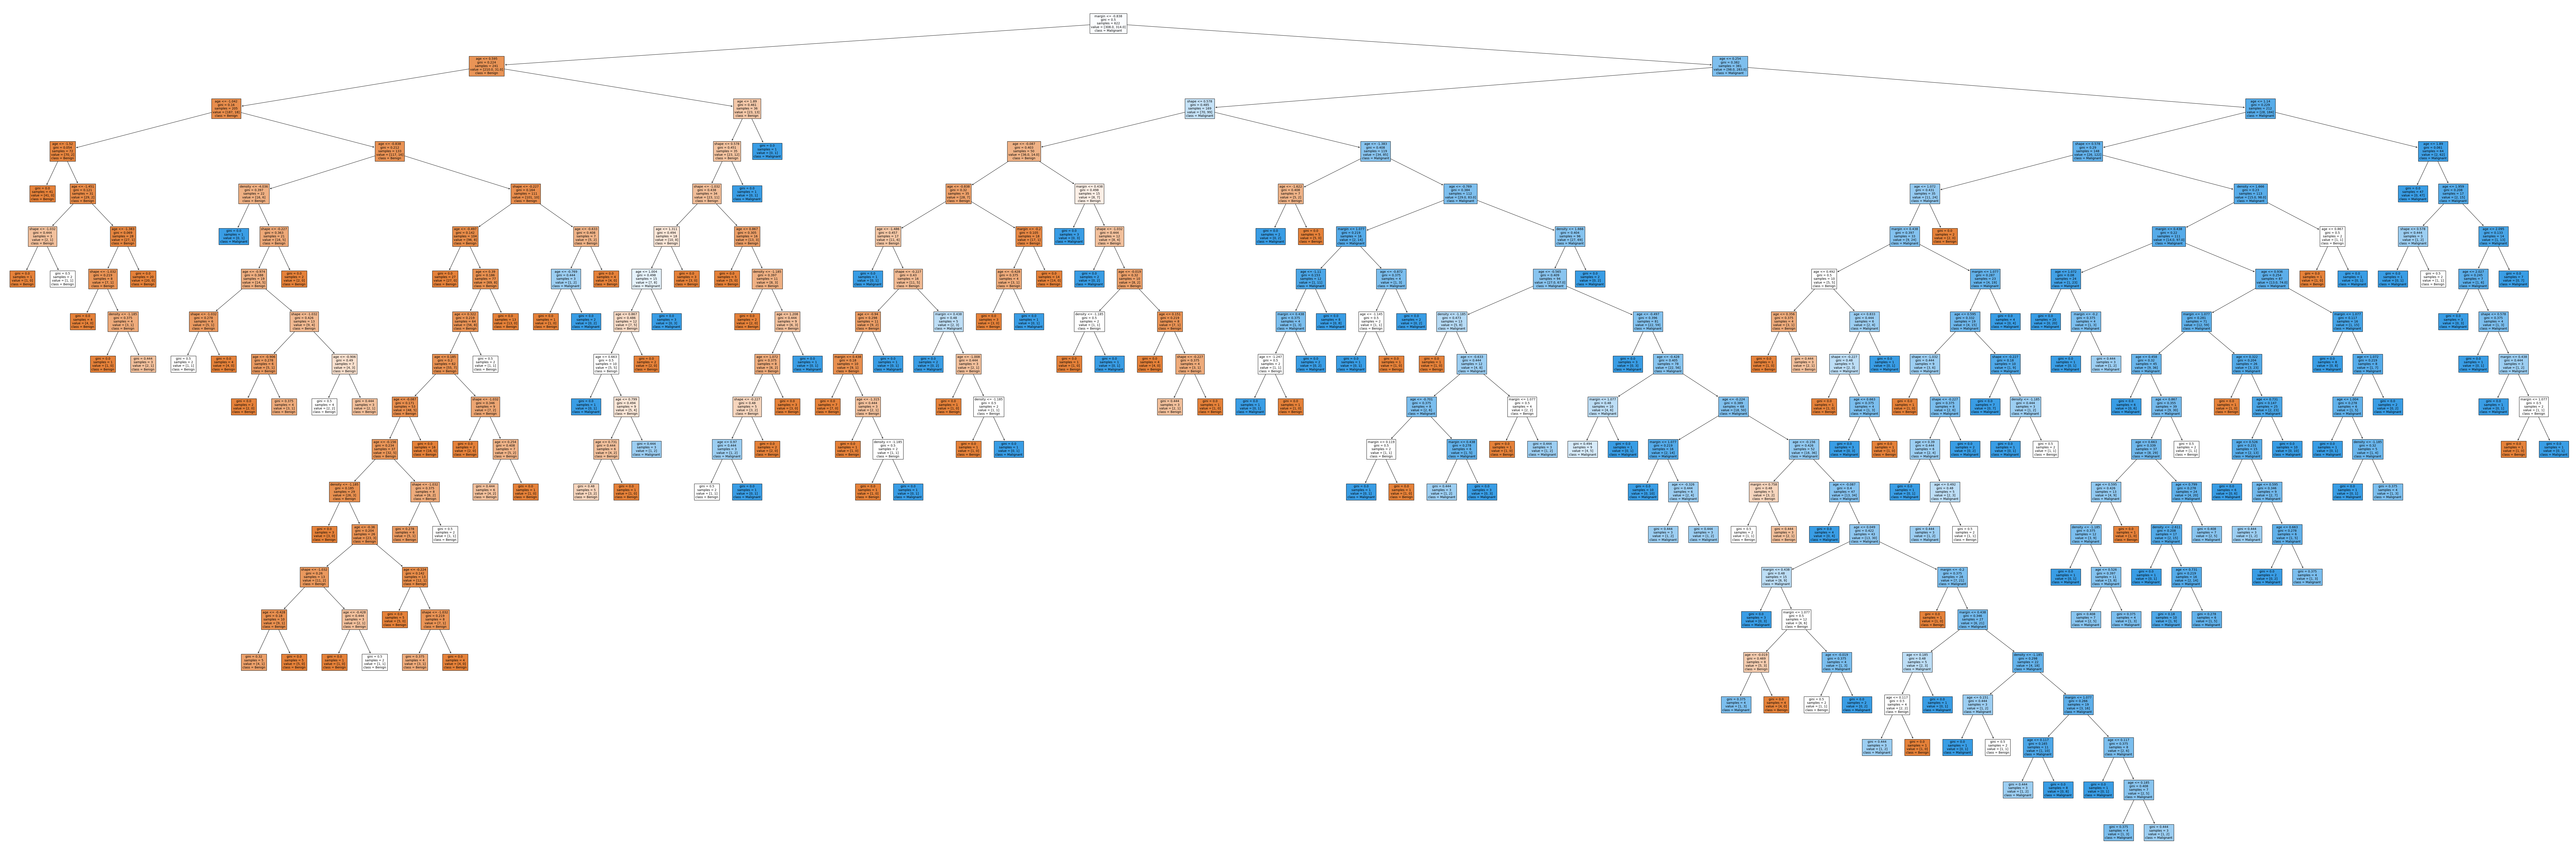

單決策樹模型的準確度為: 0.7355769230769231
用交叉驗證平均準確率為: 0.7349397590361446


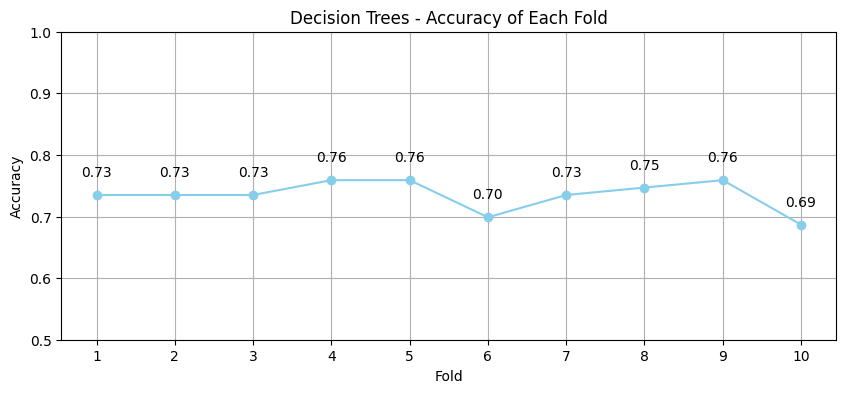

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 把數據分割成訓練集75%和測試集25%，在設定random_state=1以方便觀看
training_inputs, testing_inputs, training_prediction, testing_prediction = train_test_split(normalized_all_features,
                                                                                            all_prediction,
                                                                                            test_size=0.25,
                                                                                            random_state=1)
# 使用訓練集進行決策樹模型的訓練
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(training_inputs, training_prediction)

plt.figure(figsize=(150, 50))
tree.plot_tree(tree_classifier,
               filled=True, # 自動填充色彩提高可視化
               feature_names=feature_names,
               class_names=['Benign', 'Malignant'],
               fontsize=10)
plt.show()

# 使用模型對測試數據進行預測
y_pred = tree_classifier.predict(testing_inputs)
accuracy = accuracy_score(testing_prediction, y_pred)
print("單決策樹模型的準確度為:", accuracy)
# 印出來的決策樹可以下載下來觀看，每格的字都有詳細數值




        # 以下為用k-fold交叉驗證決策樹模型
from sklearn.model_selection import cross_val_score
import random

DT_cv_scores = cross_val_score(tree_classifier, # 指定要評估的模型
                         normalized_all_features,
                         all_prediction, # 目標變量
                         cv=10) # 測best_cv次，由於數據數量不夠先設10

print("用交叉驗證平均準確率為:", DT_cv_scores.mean())

    # 繪製圖
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(DT_cv_scores) + 1), DT_cv_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Decision Trees - Accuracy of Each Fold')
plt.xticks(range(1, len(DT_cv_scores) + 1)) # 設置x軸範圍
plt.ylim(0.5, 1) # 設置y軸範圍
plt.grid(True) # 添加網格
for i, score in enumerate(DT_cv_scores): # enumerate函式(第幾次,分數)
    plt.text(i + 1,
             score + 0.03, # 加 0.03 用來上移數值以免與點重疊
             f'{score:.2f}', # 顯示小數點後2位
             ha='center')  # 在每個柱子上方加入準確度
plt.show()

# RandomForestClassifier 隨機森林分類

平均的準確度: 0.7421686746987952


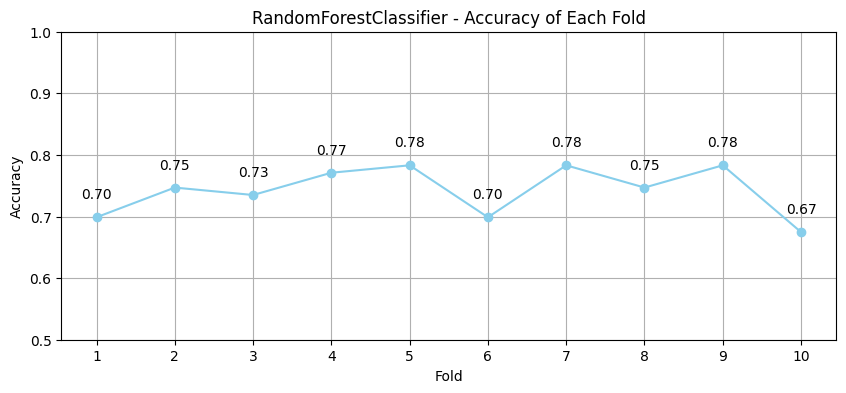

In [5]:
#以下為用RandomForestClassifier隨機森林分類結合交叉驗證
from sklearn.ensemble import RandomForestClassifier

# 設10棵樹來建隨機森林
clf = RandomForestClassifier(n_estimators=10,random_state=1)

# 使用交叉驗證
RF_cv_scores = cross_val_score(clf, normalized_all_features, all_prediction, cv=10)

# 交叉驗證準確平均
average_accuracy = RF_cv_scores.mean()
print("平均的準確度:", average_accuracy)

# 繪製圖
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(RF_cv_scores) + 1), RF_cv_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('RandomForestClassifier - Accuracy of Each Fold')
plt.xticks(range(1, len(RF_cv_scores) + 1))
plt.ylim(0.5, 1)  # 設置y軸範圍為0到1
plt.grid(True)  # 添加網格
for i, score in enumerate(RF_cv_scores):
    plt.text(i + 1, score + 0.03, f'{score:.2f}', ha='center') # 每個數據點上方添加數值
plt.show()

# SVM 支撐向量機

最好的核函數(performing kernel)為: rbf
準確度最高為: 0.8012048192771084


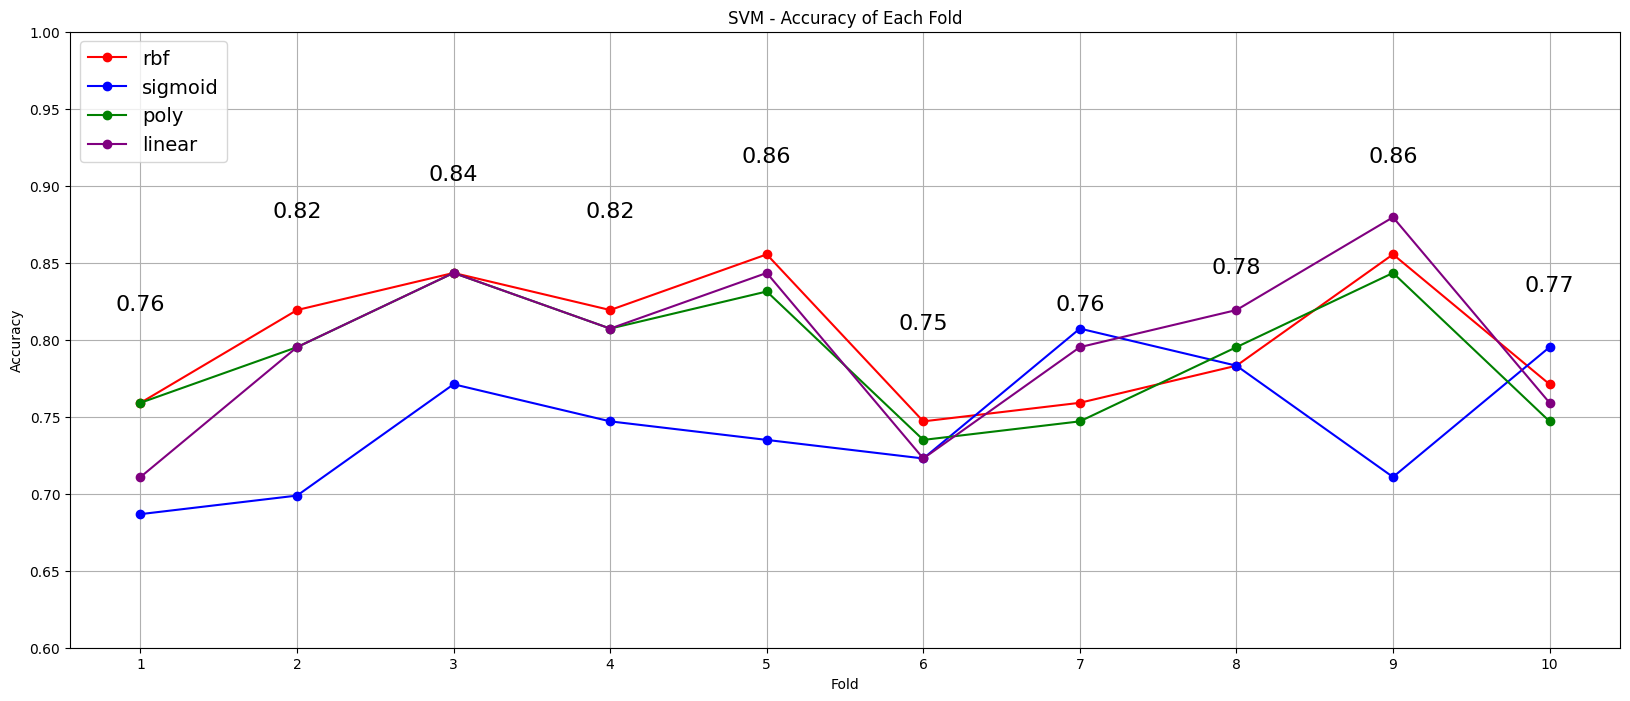

In [9]:
#以下用各種SVM裡的核函數來改變向量機在特徵空間裡計算點與點之間距離的方式，從而影響模型的分類性能
from sklearn import svm

kernels = ['rbf', 'sigmoid', 'poly','linear']
colors = ['red', 'blue', 'green','purple']
best_accuracy = 0
best_kernel = ''
plt.figure(figsize=(20, 8))

for kernel, color in zip(kernels, colors):
    svc = svm.SVC(kernel=kernel)
    
    #使用交叉驗證評估模型
    SVM_cv_scores = cross_val_score(svc, normalized_all_features, all_prediction, cv=10)
    
    #計算平均準確率
    average_accuracy = SVM_cv_scores.mean()
    
    plt.plot(range(1, len(SVM_cv_scores) + 1), SVM_cv_scores, marker='o', color=color, linestyle='-',label=kernel)
    
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_kernel = kernel

print("最好的核函數(performing kernel)為:", best_kernel)
print("準確度最高為:", best_accuracy)
svc = svm.SVC(kernel=best_kernel)
SVM_cv_scores = cross_val_score(svc, normalized_all_features, all_prediction, cv=10)

    # 繪製圖
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM - Accuracy of Each Fold')
plt.xticks(range(1, len(SVM_cv_scores) + 1))
plt.ylim(0.6, 1)  # 設置y軸範圍為0到1
plt.grid(True)  # 添加網格
plt.legend(loc='upper left',fontsize=14) # 標籤擺放位置

for i, score in enumerate(SVM_cv_scores):
    plt.text(i + 1, score + 0.06, f'{score:.2f}', ha='center',fontsize=16) # 每個數據點上方添加數值

plt.show()

# KNN


K值最好為: 87
準確度最高為: 0.8096385542168674


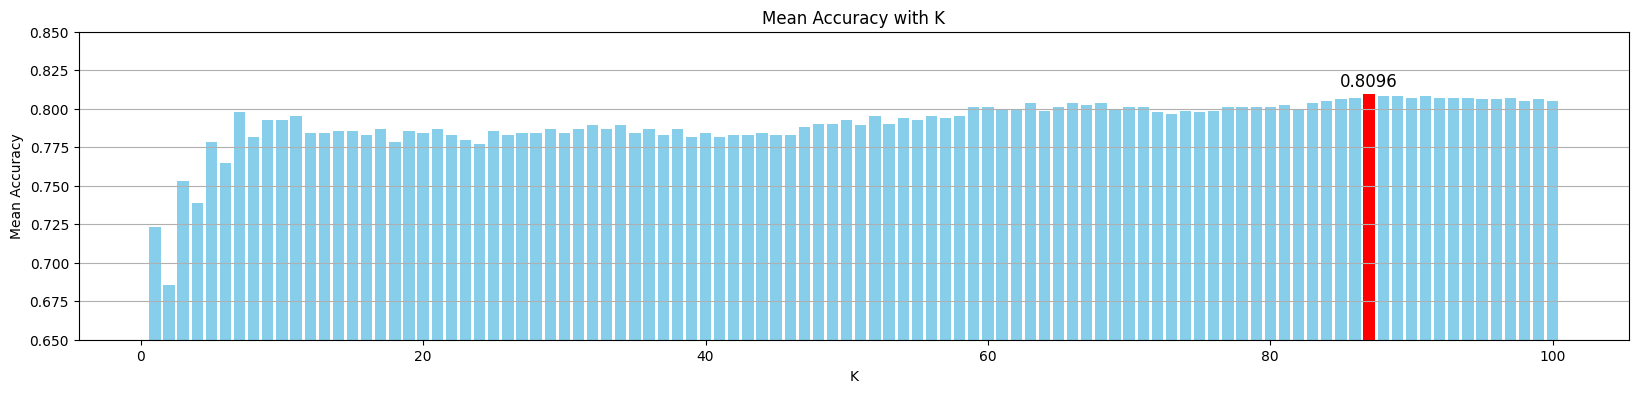

In [10]:
from sklearn import neighbors
import matplotlib.pyplot as plt

mean_accuracies = []
k_values = list(range(1, 101))
best_mean = 0
best_k = 0

for k in k_values:
    # 建立KNN分類器
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # 使用10折交叉驗證計算平均準確度
    KNN_cv_scores = cross_val_score(clf, normalized_all_features, all_prediction, cv=10)
    mean_accuracy = KNN_cv_scores.mean()
    mean_accuracies.append(mean_accuracy)
    
    # 更新最佳平均準確度和最佳K值
    if mean_accuracy > best_mean:
        best_mean = mean_accuracy
        best_k = k

clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
KNN_cv_scores = cross_val_score(clf, normalized_all_features, all_prediction, cv=10)

print("\nK值最好為:", best_k)
print("準確度最高為:", best_mean)

    # 繪製圖
bar_colors = ['skyblue'] * 100 # 設定全部柱體顏色為skyblue
bar_colors[best_k-1] = 'red' # 只更改最高的為red

plt.figure(figsize=(20, 4))
bars = plt.bar(k_values, mean_accuracies, color=bar_colors)
plt.xlabel('K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy with K')
plt.ylim(0.65, 0.85)
plt.grid(axis='y')

    # 判斷最高柱狀為何並加上標籤
for bar in bars:
    height = bar.get_height()
    if height == best_mean:
        # get_x()抓取x位置、get_width()抓取柱狀的中心點
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{height:.4f}', ha='center', color='black', fontsize=12)

plt.show()

# Naive Bayes 貝氏分類器

計算平均準確率為 : 0.7855421686746988


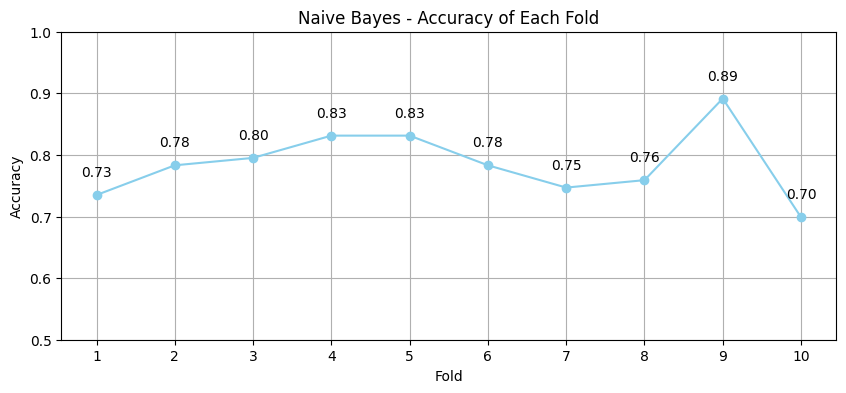

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing # 該套件用於資料處裡，標準化、正規化、填補缺失值等

# 對特徵數據進行最小最大縮放提高模型收斂速度和消除不同特徵間的量級差異
calculate = preprocessing.MinMaxScaler()
all_features_minmax = calculate.fit_transform(all_features)
clf = MultinomialNB()

# 使用交叉驗證評估模型
NB_cv_scores = cross_val_score(clf, all_features_minmax, all_prediction,cv=10)

# 計算平均準確率
average_accuracy = NB_cv_scores.mean()
print("計算平均準確率為 :", average_accuracy)

    # 繪製圖
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(NB_cv_scores) + 1), NB_cv_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Naive Bayes - Accuracy of Each Fold')
plt.xticks(range(1, len(NB_cv_scores) + 1))
plt.ylim(0.5, 1)  # 設置y軸範圍為0到1
plt.grid(True)  # 添加網格
for i, score in enumerate(NB_cv_scores):
    plt.text(i + 1, score + 0.03, f'{score:.2f}', ha='center') # 每個數據點上方添加數值
plt.show()

# Logistic Regression 邏輯迴歸

計算平均準確率為 : 0.8072289156626505


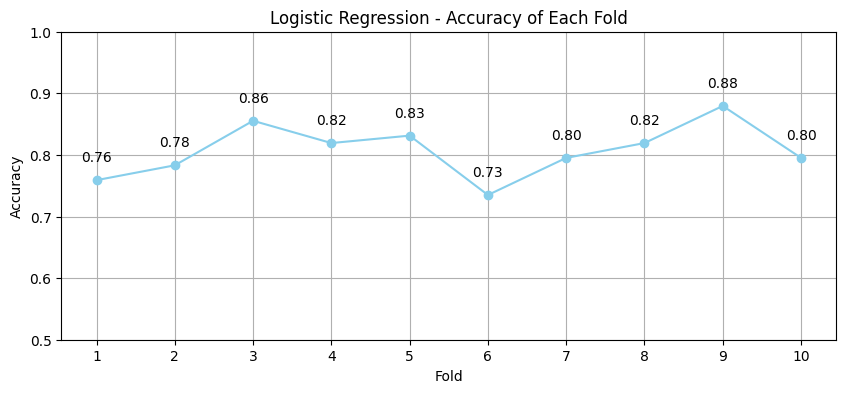

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# 使用交叉驗證評估模型
LR_cv_scores = cross_val_score(logreg, normalized_all_features, all_prediction, cv=10)

# 計算平均準確率
average_accuracy = LR_cv_scores.mean()
print("計算平均準確率為 :", average_accuracy)

    # 繪製圖
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(LR_cv_scores) + 1), LR_cv_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Logistic Regression - Accuracy of Each Fold')
plt.xticks(range(1, len(LR_cv_scores) + 1))
plt.ylim(0.5, 1)  # 設置y軸範圍為0到1
plt.grid(True)  # 添加網格
for i, score in enumerate(LR_cv_scores):
    plt.text(i + 1, score + 0.03, f'{score:.2f}', ha='center') # 每個數據點上方添加數值
plt.show()

# 總結

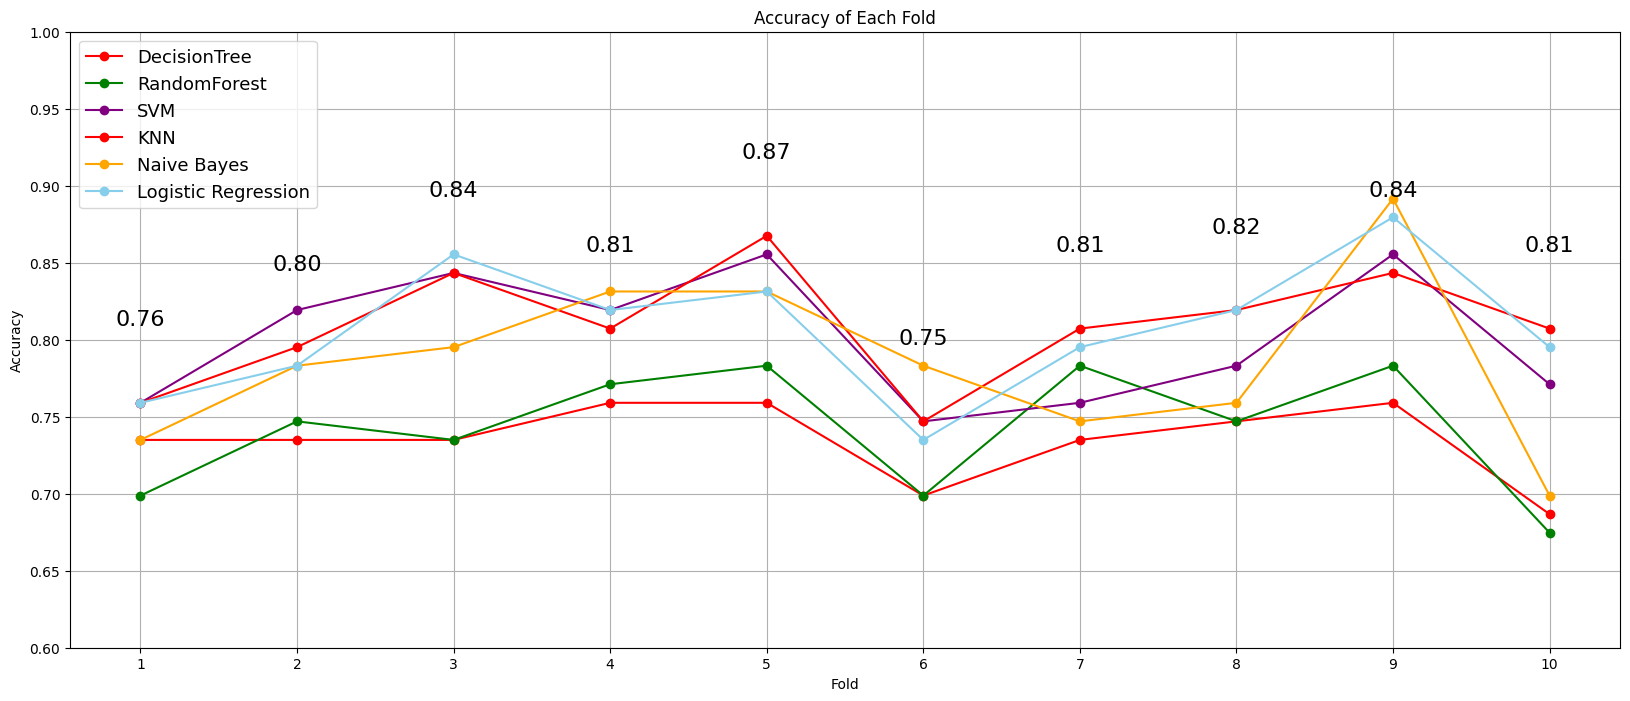

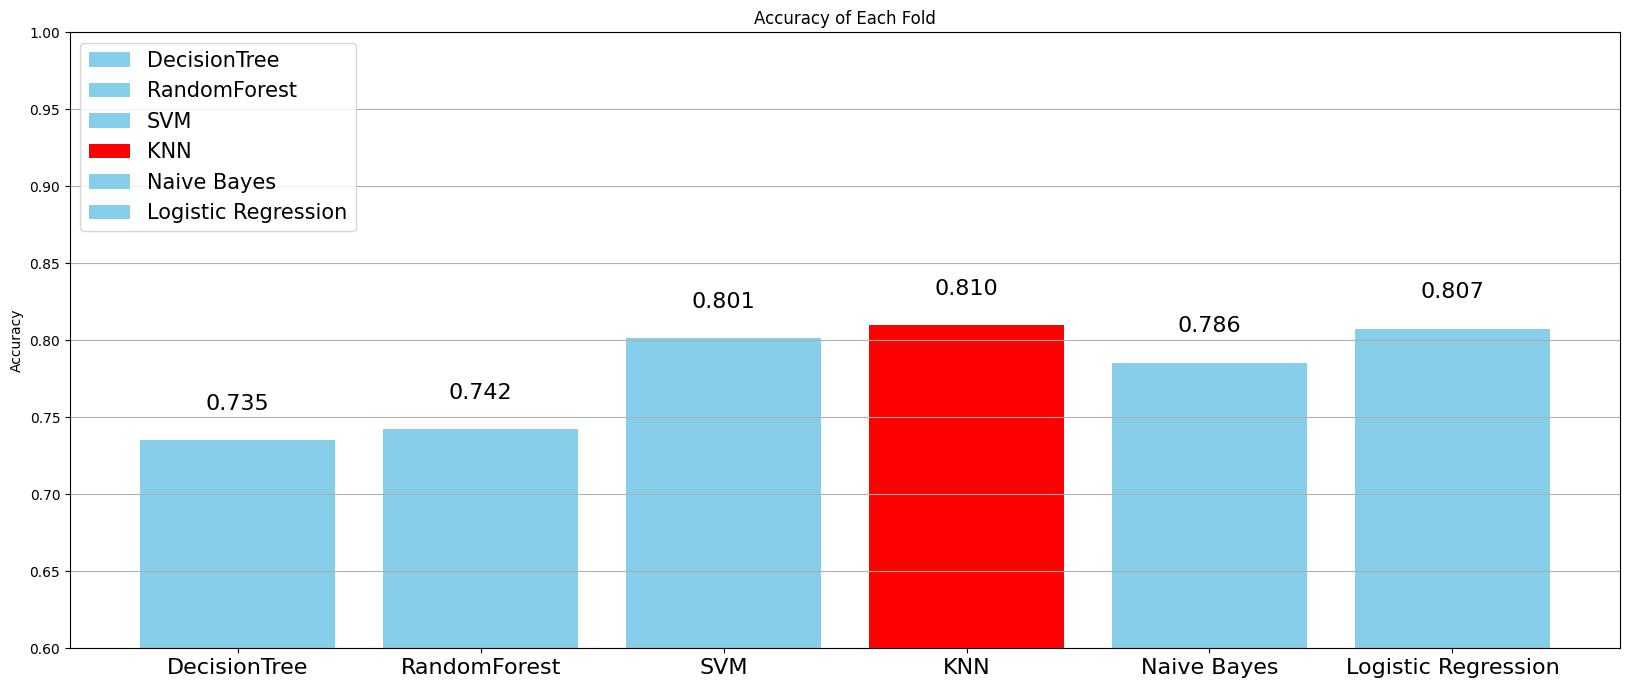

In [13]:
        # 印出比較各個模型交叉驗證後的準確度


    # 折線圖
plt.figure(figsize=(20, 8))

# 繪製各個曲線
plt.plot(range(1, len(DT_cv_scores) + 1), DT_cv_scores, marker='o', color='red', linestyle='-', label='DecisionTree')
plt.plot(range(1, len(RF_cv_scores) + 1), RF_cv_scores, marker='o', color='green', linestyle='-', label='RandomForest')
plt.plot(range(1, len(SVM_cv_scores) + 1), SVM_cv_scores, marker='o', color='purple', linestyle='-', label='SVM')
plt.plot(range(1, len(KNN_cv_scores) + 1), KNN_cv_scores, marker='o', color='red', linestyle='-', label='KNN')
plt.plot(range(1, len(NB_cv_scores) + 1), NB_cv_scores, marker='o', color='orange', linestyle='-', label='Naive Bayes')
plt.plot(range(1, len(LR_cv_scores) + 1), LR_cv_scores, marker='o', color='skyblue', linestyle='-', label='Logistic Regression')

# 設置標籤和標題
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Fold')
plt.xticks(range(1, len(KNN_cv_scores) + 1))
plt.ylim(0.6, 1) # 設置y軸為0.4到1
plt.legend(loc='upper left', fontsize=13)
plt.grid(True)

# 每個數據點上方添加數值 #由於KNN分數最高，所以印出KNN的值
for i, score in enumerate(KNN_cv_scores):
    plt.text(i + 1, score + 0.05, f'{score:.2f}', ha='center', fontsize=16)
plt.show()





    # 直方圖
plt.figure(figsize=(20, 8))

# 先設定直方圖需要的數值
models = ['DecisionTree', 'RandomForest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression']
models2 = ['DecisionTree', 'RandomForest', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression']
accuracies = [DT_cv_scores.mean(), RF_cv_scores.mean(), SVM_cv_scores.mean(), KNN_cv_scores.mean(), NB_cv_scores.mean(), LR_cv_scores.mean()]

# 繪製各個曲線
plt.bar(models, accuracies, color=['skyblue', 'skyblue', 'skyblue', 'red', 'skyblue', 'skyblue'], label=models)

# 設置標籤和標題
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Fold')
plt.ylim(0.6, 1) # 設置y軸為0.4到1
plt.grid(axis='y')
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=16)

# 每個數據點上方添加數值
for i, score in enumerate(accuracies):
    bars = plt.text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=16)

plt.show()

經過實際測試，KNN模型展現出較高的準確性和可靠性，這一發現對於改善乳癌檢測流程，提高準確性，
並減少誤診率具有重要意義，有望對提高乳癌患者的生存率和生活品質產生積極正面影響。